In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#dataset
file_path = "/content/ObesityDataSet_raw_and_data_sinthetic.csv"
df = pd.read_csv(file_path)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
#Longitud del dataset 2111  filas, 17 columnas
df.shape

(2111, 17)

In [ ]:
#Descripción de columnas:
#Gender – Male or Female.
#Age – The person’s age in years.
#Height – Height in meters.
#Weight – Weight in kilograms.
#family_history_with_overweight – Whether the person has a family history of being overweight (yes/no).
#FAVC – If the person frequently consumes high-calorie foods (yes/no).
#FCVC – Frequency of vegetable consumption (scale from 1 to 3).
#NCP – Number of main meals per day.
#CAEC – Frequency of consuming food between meals (Never, Sometimes, Frequently, Always).
#SMOKE – Whether the person smokes (yes/no).
#CH2O – Daily water intake (scale from 1 to 3).
#SCC – If the person monitors their calorie intake (yes/no).
#FAF – Physical activity frequency (scale from 0 to 3).
#TUE – Time spent using technology (scale from 0 to 3).
#CALC – Frequency of alcohol consumption (Never, Sometimes, Frequently, Always).
#MTRANS – Main mode of transportation (Automobile, Bike, Motorbike, Public Transportation, Walking).
#NObeyesdad – Obesity level (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III).

In [ ]:
#Tipos de datos
df.dtypes

,0
Gender,object
Age,int64
Height,float64
Weight,float64
family_history_with_overweight,object
FAVC,object
FCVC,float64
NCP,float64
CAEC,object
SMOKE,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
#x = Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
#y = NObeyesdad(Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III)

In [ ]:
# y = multiples
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [ ]:
#no hay datos nulos
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [ ]:
#24 filas duplicadas
df.duplicated().sum()

24

In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
df.describe(include="object")

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [ ]:
#Para saber los pesos
tarta=df['NObeyesdad'].value_counts()
tarta

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


([<matplotlib.patches.Wedge at 0x79b580b17c90>,
 [Text(0.9533093018443864, 0.5488181620691581, 'Obesity_Type_I'),
  Text(0.04827659413120045, 1.098940112316905, 'Obesity_Type_III'),
  Text(-0.8480026696961722, 0.7006364764898876, 'Obesity_Type_II'),
  Text(-1.081622638065542, -0.2002310386132419, 'Overweight_Level_I'),
  Text(-0.5509448613808724, -0.9520818030600162, 'Overweight_Level_II'),
  Text(0.3607122048336628, -1.039175974166088, 'Normal_Weight'),
  Text(1.0111033311950712, -0.43320901842670617, 'Insufficient_Weight')],
 [Text(0.5199868919151198, 0.29935536112863165, '16.6%'),
  Text(0.026332687707927516, 0.5994218794455844, '15.3%'),
  Text(-0.4625469107433666, 0.3821653508126659, '14.1%'),
  Text(-0.5899759843993865, -0.1092169301526774, '13.7%'),
  Text(-0.3005153789350213, -0.5193173471236452, '13.7%'),
  Text(0.1967521117274524, -0.5668232586360479, '13.6%'),
  Text(0.5515109079245842, -0.2362958282327488, '12.9%')])

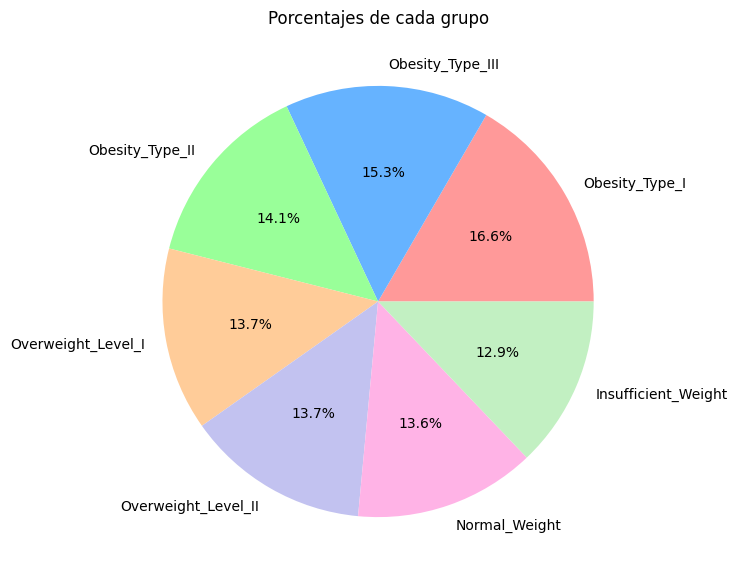

In [ ]:
plt.figure(figsize=(7, 7))
plt.title("Porcentajes de cada grupo")
plt.pie(tarta.values, labels=tarta.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6', '#c2f0c2'])

Text(0.5, 1.0, 'Obesidad por sexo')

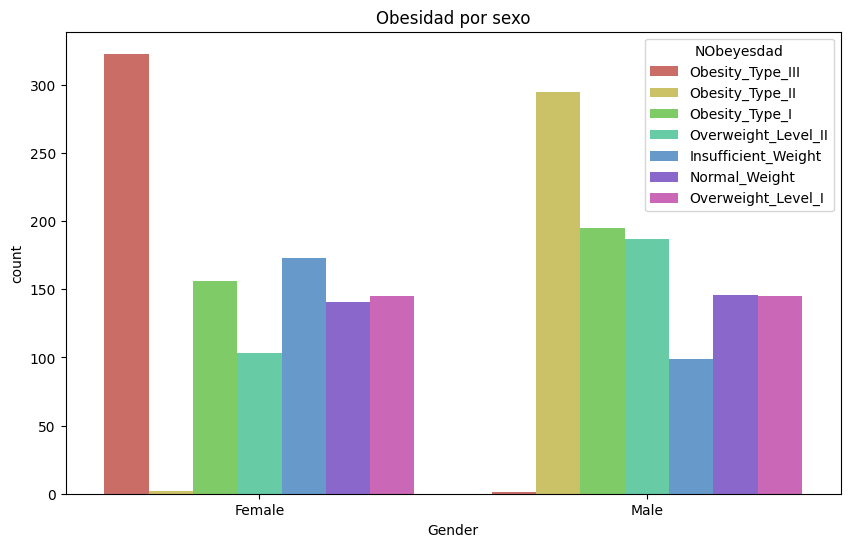

In [ ]:
data = df[['Gender','NObeyesdad']].value_counts().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='Gender', y='count', hue='NObeyesdad', palette='hls')
plt.title("Relación obesidad por sexo")

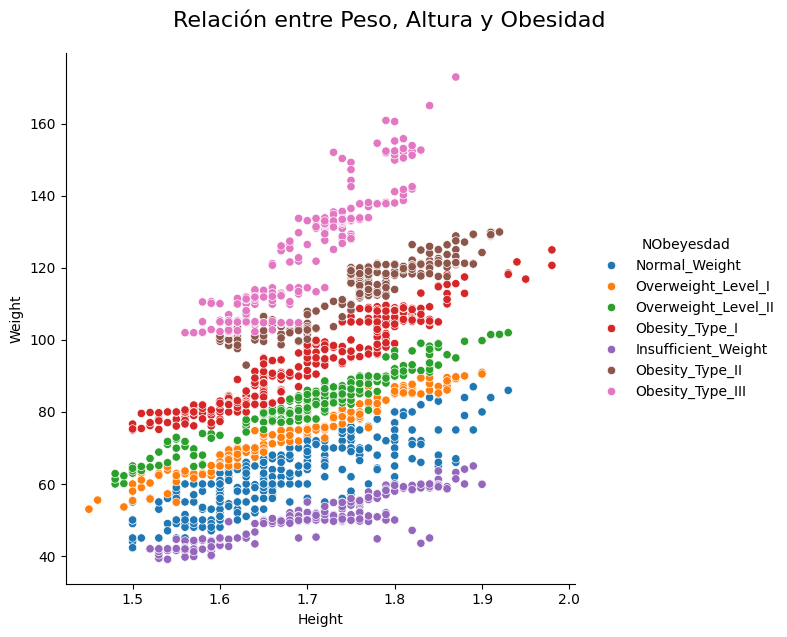

In [ ]:
grafico=sns.pairplot(df,x_vars="Height", y_vars="Weight", hue="NObeyesdad", height=6)
grafico.fig.suptitle("Relación entre Peso, Altura y Obesidad", fontsize=16, y=1.05)
plt.show()

<ipython-input-55-c5c0f4415ee0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby(["Age_Group", "NObeyesdad"]).size().reset_index(name="count")


Text(0.5, 1.0, 'Relación obesidad por edad')

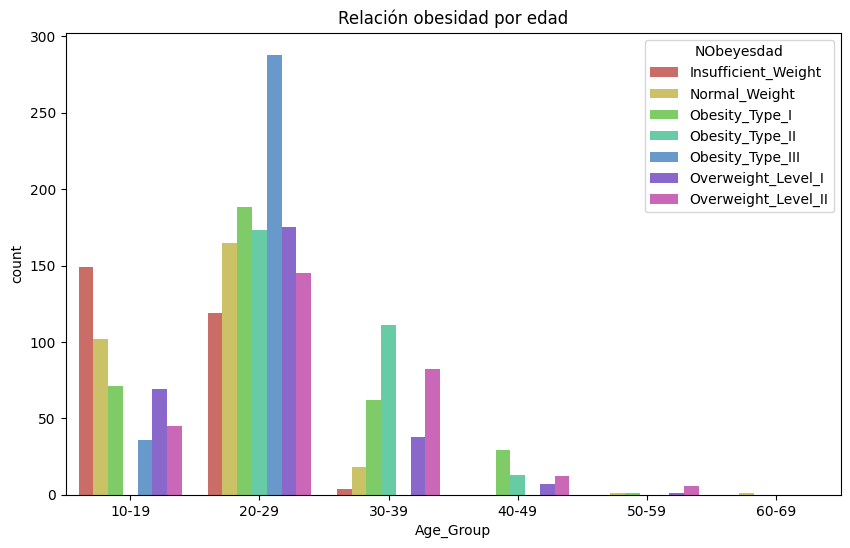

In [ ]:
#Age
df["Age_Group"] = pd.cut(df["Age"], bins=range(10, 71, 10), right=False, labels=[f"{i}-{i+9}" for i in range(10, 70, 10)])
data = df.groupby(["Age_Group", "NObeyesdad"]).size().reset_index(name="count")
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='Age_Group', y='count', hue='NObeyesdad', palette='hls')
plt.title("Relación obesidad por edad")

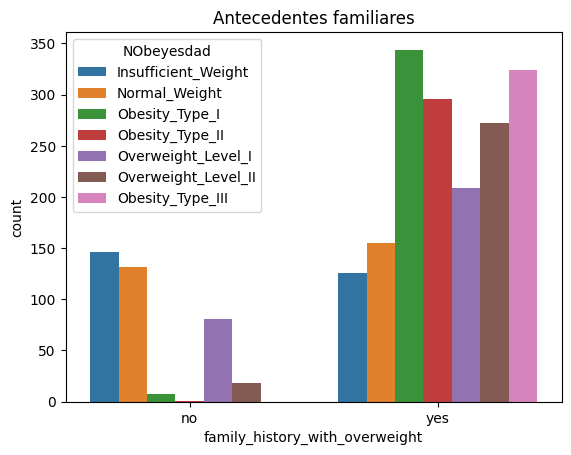

In [ ]:
#family_history_with_overweight
familia=df.groupby(["family_history_with_overweight", "NObeyesdad"]).size().reset_index(name="count")
sns.barplot(data=familia,x="family_history_with_overweight", y="count", hue="NObeyesdad")
plt.title("Antecedentes familiares")
plt.show()

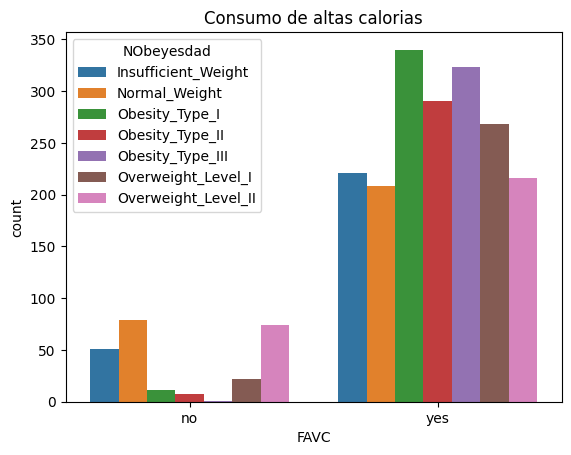

In [ ]:
#FAVC
datos=df.groupby(["FAVC", "NObeyesdad"]).size().reset_index(name="count")
sns.barplot(data=datos,x="FAVC", y="count", hue="NObeyesdad")
plt.title("Consumo de altas calorias")
plt.show()

<ipython-input-106-1a6ee1639fdb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos=df.groupby(["Calorias_Group", "NObeyesdad"]).size().reset_index(name="count")


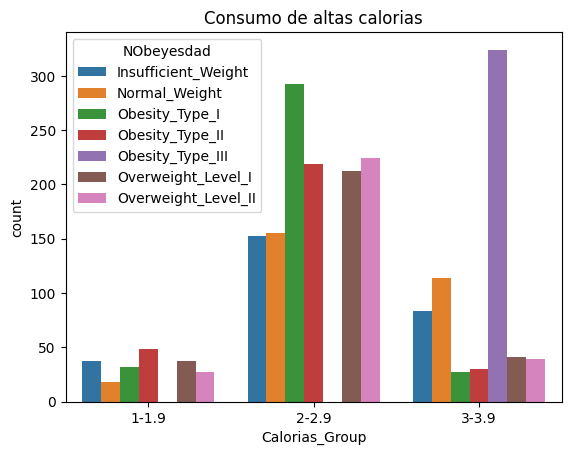

In [ ]:
#FCVC
df["Calorias_Group"]=pd.cut(df["FCVC"], bins=range(1, 5, 1), right=False, labels=[f"{i}-{i+0.9}" for i in range(1, 4, 1)])
datos=df.groupby(["Calorias_Group", "NObeyesdad"]).size().reset_index(name="count")
sns.barplot(data=datos,x="Calorias_Group", y="count", hue="NObeyesdad")
plt.title("Consumo de altas calorias")
plt.show()

<ipython-input-123-be3c46100dde>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos=df.groupby(["Vegetales_Group", "NObeyesdad"]).size().reset_index(name="count")


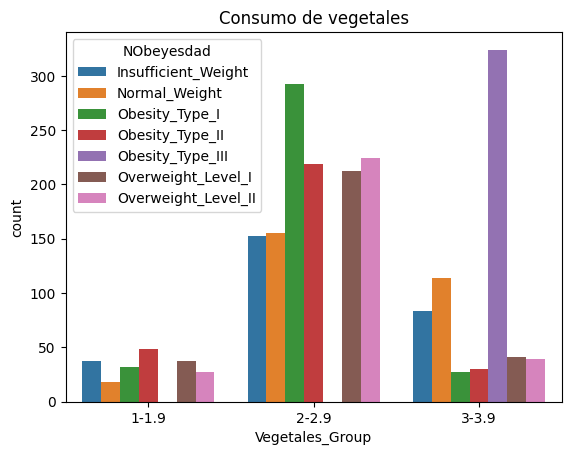

In [ ]:
#FCVC
df["Vegetales_Group"]=pd.cut(df["FCVC"], bins=range(1, 5, 1), right=False, labels=[f"{i}-{i+0.9}" for i in range(1, 4, 1)])
datos=df.groupby(["Vegetales_Group", "NObeyesdad"]).size().reset_index(name="count")
sns.barplot(data=datos,x="Vegetales_Group", y="count", hue="NObeyesdad")
plt.title("Consumo de vegetales")
plt.show()

<ipython-input-122-072939a9a0bc>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos=df.groupby(["Comidas_Group", "NObeyesdad"]).size().reset_index(name="count")


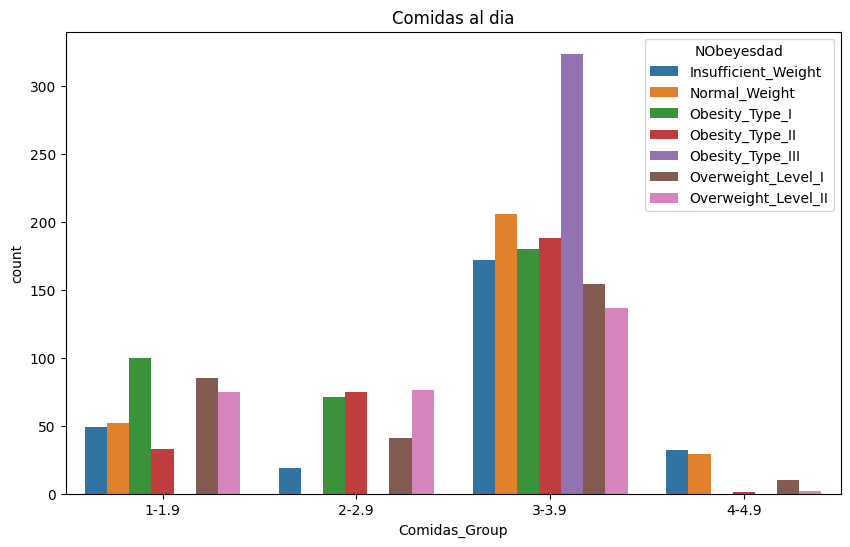

In [ ]:
#NCP
plt.figure(figsize=(10,6))
df["Comidas_Group"]=pd.cut(df["NCP"], bins=range(1, 6, 1), right=False, labels=[f"{i}-{i+0.9}" for i in range(1, 5, 1)])
datos=df.groupby(["Comidas_Group", "NObeyesdad"]).size().reset_index(name="count")
sns.barplot(data=datos,x="Comidas_Group", y="count", hue="NObeyesdad")
plt.title("Comidas al dia")
plt.show()

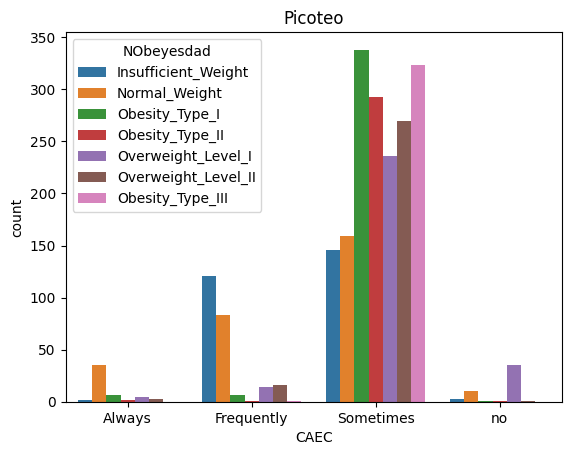

In [ ]:
#CAEC
plt.figure(figsize=(10,6))
datos=df.groupby(["CAEC", "NObeyesdad"]).size().reset_index(name="count")
sns.barplot(data=datos,x="CAEC", y="count", hue="NObeyesdad")
plt.title("Picoteo")
plt.show()

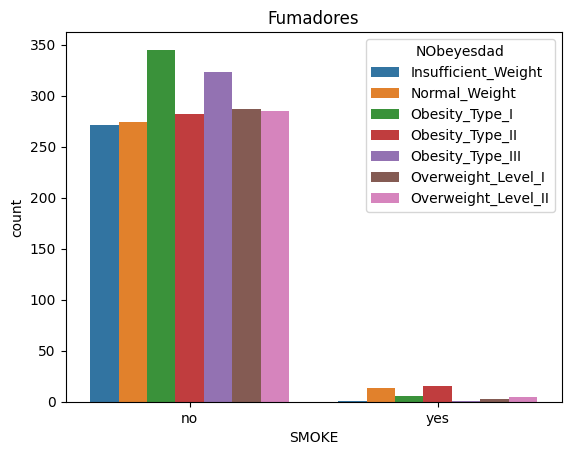

In [ ]:
#SMOKE
datos=df.groupby(["SMOKE", "NObeyesdad"]).size().reset_index(name="count")
sns.barplot(data=datos,x="SMOKE", y="count", hue="NObeyesdad")
plt.title("Fumadores")
plt.show()

<ipython-input-109-dedf98293fb1>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos=df.groupby(["Agua_Group", "NObeyesdad"]).size().reset_index(name="count")


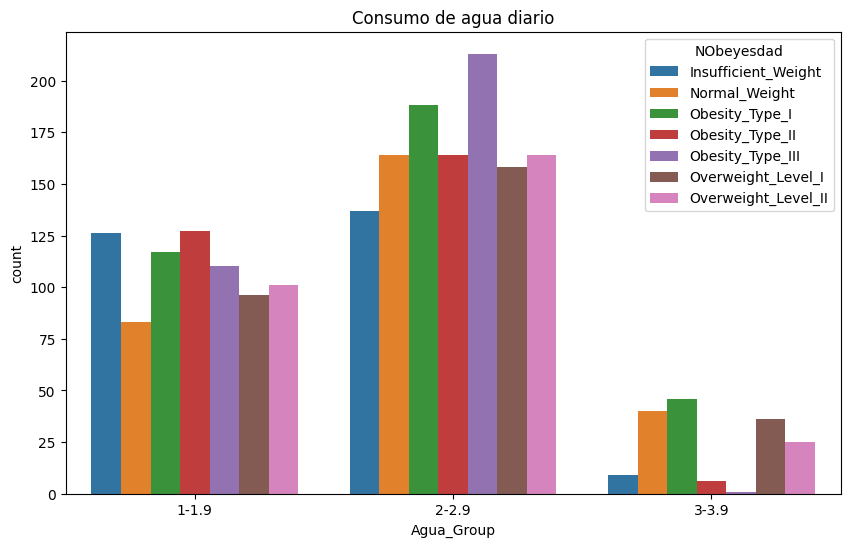

In [ ]:
#CH2O
plt.figure(figsize=(10,6))
df["Agua_Group"]=pd.cut(df["CH2O"], bins=range(1, 5, 1), right=False, labels=[f"{i}-{i+0.9}" for i in range(1, 4, 1)])
datos=df.groupby(["Agua_Group", "NObeyesdad"]).size().reset_index(name="count")
sns.barplot(data=datos,x="Agua_Group", y="count", hue="NObeyesdad")
plt.title("Consumo de agua diario")
plt.show()

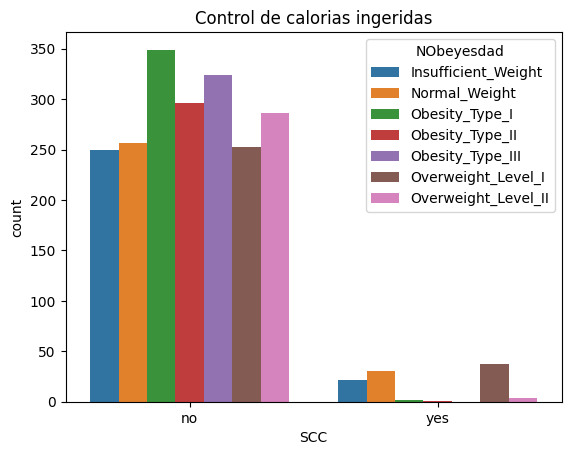

In [ ]:
#SCC
datos=df.groupby(["SCC", "NObeyesdad"]).size().reset_index(name="count")
sns.barplot(data=datos,x="SCC", y="count", hue="NObeyesdad")
plt.title("Control de calorias ingeridas")
plt.show()

<ipython-input-116-4b2902de6ba1>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos=df.groupby(["Deportes_Group", "NObeyesdad"]).size().reset_index(name="count")


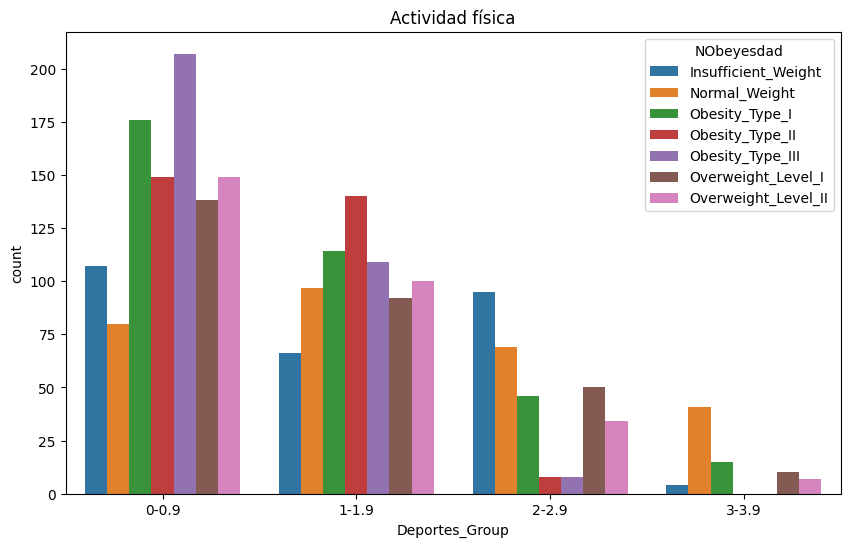

In [ ]:
#FAF
plt.figure(figsize=(10,6))
df["Deportes_Group"]=pd.cut(df["FAF"], bins=range(0, 5, 1), right=False, labels=[f"{i}-{i+0.9}" for i in range(0, 4, 1)])
datos=df.groupby(["Deportes_Group", "NObeyesdad"]).size().reset_index(name="count")
sns.barplot(data=datos,x="Deportes_Group", y="count", hue="NObeyesdad")
plt.title("Actividad física")
plt.show()

<ipython-input-115-35f4f2d11f0c>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos=df.groupby(["tecnologia_Group", "NObeyesdad"]).size().reset_index(name="count")


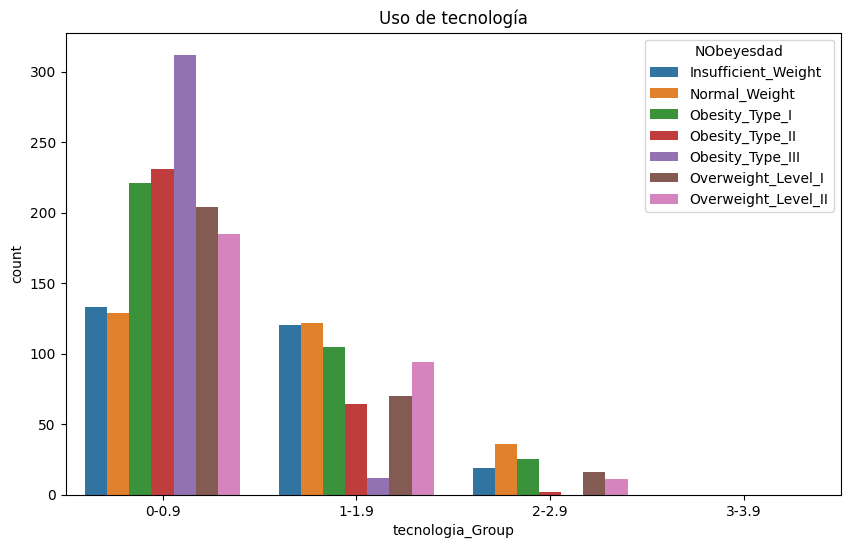

In [ ]:
#TUE
plt.figure(figsize=(10,6))
df["tecnologia_Group"]=pd.cut(df["TUE"], bins=range(0, 5, 1), right=False, labels=[f"{i}-{i+0.9}" for i in range(0, 4, 1)])
datos=df.groupby(["tecnologia_Group", "NObeyesdad"]).size().reset_index(name="count")
sns.barplot(data=datos,x="tecnologia_Group", y="count", hue="NObeyesdad")
plt.title("Uso de tecnología")
plt.show()

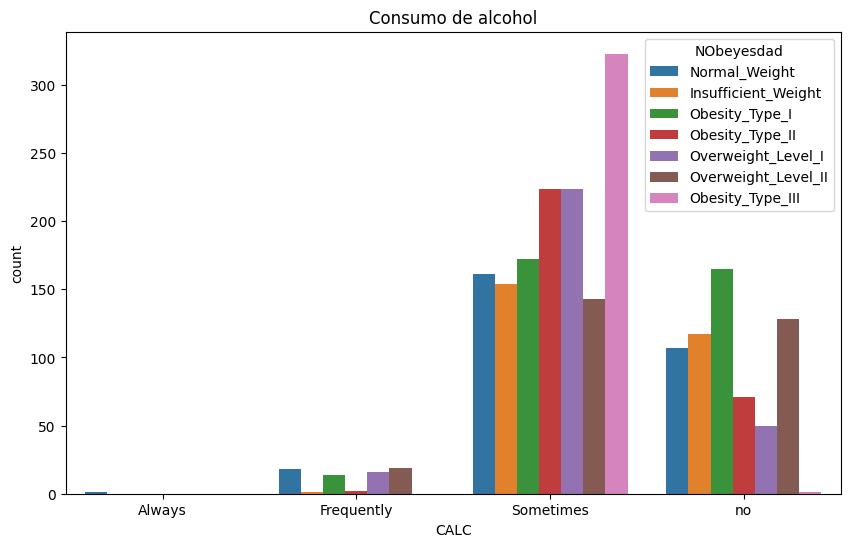

In [5]:
#CALC
plt.figure(figsize=(10,6))
datos=df.groupby(["CALC", "NObeyesdad"]).size().reset_index(name="count")
sns.barplot(data=datos,x="CALC", y="count", hue="NObeyesdad")
plt.title("Consumo de alcohol")
plt.show()

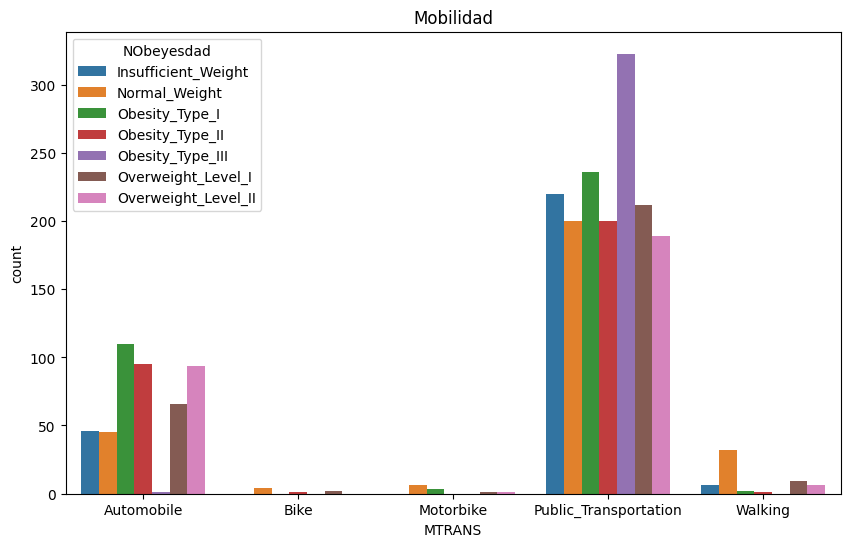

In [ ]:
#MTRANS
plt.figure(figsize=(10,6))
datos=df.groupby(["MTRANS", "NObeyesdad"]).size().reset_index(name="count")
sns.barplot(data=datos,x="MTRANS", y="count", hue="NObeyesdad")
plt.title("Mobilidad")
plt.show()

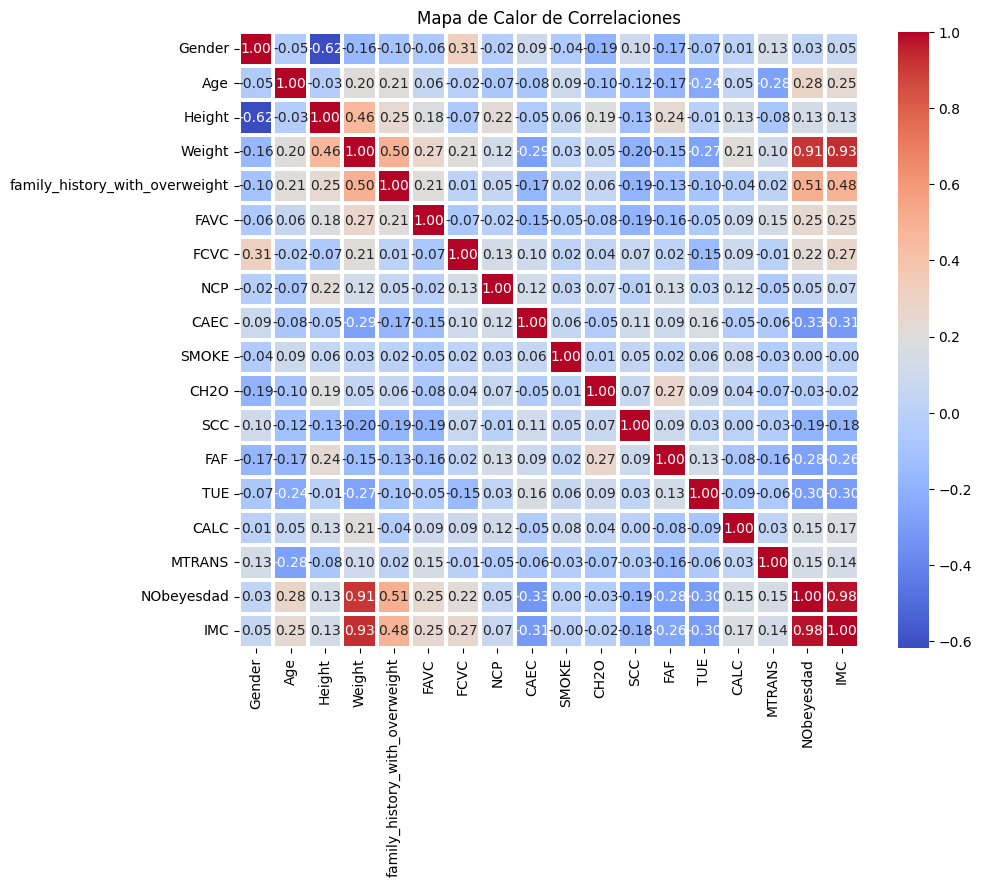